# Exploratory Data Analysis (EDA) - Dataset Adult

# Nama: Firman Naufal Aryaputra
# NIM: A11.2022.14181
# Mata Kuliah: Bengkel Koding DS01



In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Membaca dataset

In [ ]:
# Nama kolom
kolom = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
         'marital_status', 'occupation', 'relationship', 'race', 'sex',
         'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

# Baca dataset dan ganti ? dengan NaN
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/adult.csv', header=None, names=kolom, na_values=' ?')

data.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# 2. Eksplorasi Data (EDA)

In [ ]:
# Mengecek informasi umum dataset
print("\nInformasi dataset:")
print(data.info())


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [ ]:
# Cek statistik dasar
print("\nStatistik data:")
print(data.describe())


Statistik data:
                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [ ]:
# Cek berapa banyak nilai yang hilang (missing value)
print("\nNilai yang hilang per kolom:")
print(data.isnull().sum())


Nilai yang hilang per kolom:
age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


Terdapat Missing Value pada Workclass, occupation, dan native_country


Distribusi pendapatan:
income
<=50K    24720
>50K      7841
Name: count, dtype: int64


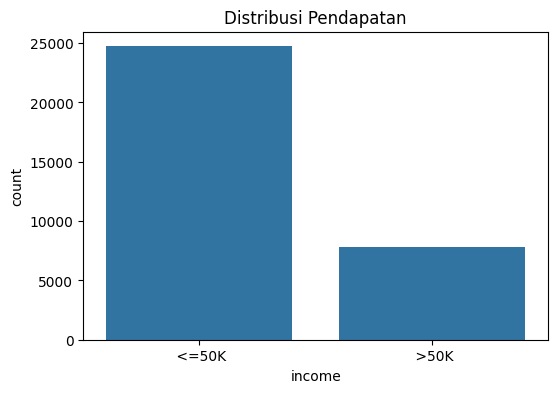

In [ ]:
# Lihat distribusi pendapatan (<=50K atau >50K)
print("\nDistribusi pendapatan:")
print(data['income'].value_counts())

# Visualisasi distribusi pendapatan
plt.figure(figsize=(6, 4))
sns.countplot(x='income', data=data)
plt.title('Distribusi Pendapatan')
plt.savefig('distribusi_pendapatan.png')
plt.show()

Grafik ini menunjukkan distribusi pendapatan dalam dataset, di mana sebagian besar individu memiliki pendapatan kurang dari atau sama dengan 50K, sementara jumlah individu dengan pendapatan lebih dari 50K jauh lebih sedikit.

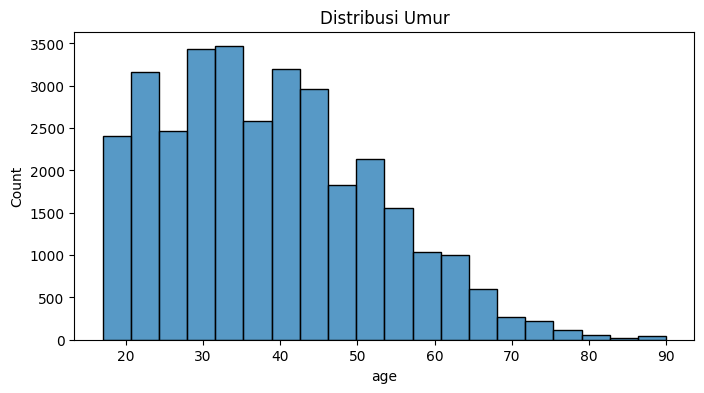

In [ ]:
# Visualisasi distribusi umur
plt.figure(figsize=(8, 4))
sns.histplot(data=data, x='age', bins=20)
plt.title('Distribusi Umur')
plt.savefig('distribusi_umur.png')
plt.show()

Grafik ini menggambarkan distribusi usia dalam dataset, menunjukkan bahwa kelompok usia terbanyak berada pada rentang usia 30-an dengan penurunan jumlah individu pada usia 40-an dan seterusnya, dengan jumlah yang sangat sedikit pada usia di atas 70 tahun.

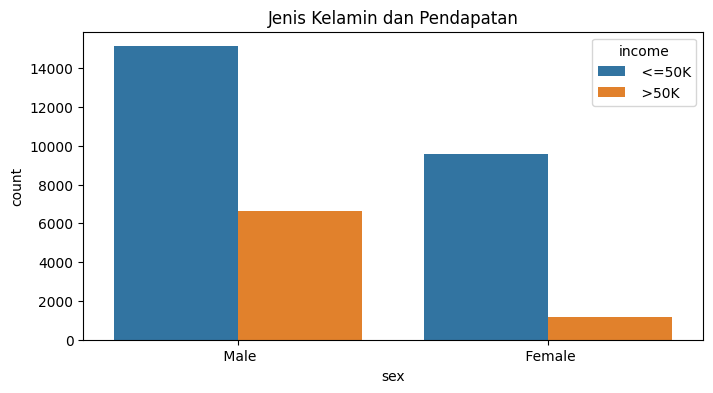

In [ ]:
# Visualisasi jenis kelamin dan pendapatan
plt.figure(figsize=(8, 4))
sns.countplot(x='sex', hue='income', data=data)
plt.title('Jenis Kelamin dan Pendapatan')
plt.savefig('gender_income.png')
plt.show()

Terdapat kurang lebih **15000** laki laki yang memiliki pendapatan kurang dari **50k** dan kurang lebih **6500** laki laki memiliki pendapatan diatas **50k**. Untuk perempuan terdapat hampir **10000** yang memiliki pendapatan kurang dari **50k** dan kurang lebih **1000** perempuan memiliki pendapatan lebih dari **50k**.

<Figure size 1200x600 with 0 Axes>

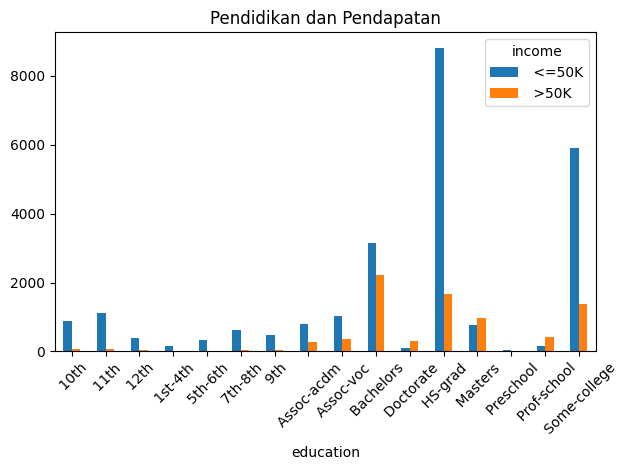

In [ ]:
# Visualisasi tingkat pendidikan dan pendapatan
plt.figure(figsize=(12, 6))
pendidikan_count = data.groupby(['education', 'income']).size().unstack()
pendidikan_count.plot(kind='bar')
plt.title('Pendidikan dan Pendapatan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('education_income.png')
plt.show()

Grafik ini menunjukkan hubungan antara tingkat pendidikan dan pendapatan, dengan warna biru mewakili pendapatan <=50K dan warna oranye mewakili pendapatan >50K. Dari grafik, terlihat bahwa sebagian besar individu dengan tingkat pendidikan lebih rendah (seperti 10th, 11th, dan 12th grade) memiliki pendapatan <=50K, sedangkan sebagian besar individu dengan tingkat pendidikan lebih tinggi (seperti Bachelors, Masters, dan Doctorate) memiliki pendapatan >50K.

# 3. Persiapan Data

In [ ]:
# Hapus baris dengan nilai yang hilang
data_bersih = data.dropna()
print("\nUkuran data setelah menghapus nilai yang hilang:", data_bersih.shape)

# Daftar kolom kategori
kolom_kategori = ['workclass', 'education', 'marital_status', 'occupation',
                 'relationship', 'race', 'sex', 'native_country']

# Menggunakan Label Encoding untuk mengubah kategori menjadi angka
from sklearn.preprocessing import LabelEncoder

data_numerik = data_bersih.copy()

# Terapkan label encoding pada setiap kolom kategori
for kolom in kolom_kategori:
    le = LabelEncoder()
    data_numerik[kolom] = le.fit_transform(data_bersih[kolom])

# Ubah target (income) menjadi angka: 1 untuk >50K, 0 untuk <=50K
data_numerik['income'] = data_numerik['income'].map({' >50K': 1, ' <=50K': 0})

print("\nData setelah encoding numerik:")
print(data_numerik.head(5))
print(f"Total kolom setelah encoding: {len(data_numerik.columns)}")


Ukuran data setelah menghapus nilai yang hilang: (30162, 15)

Data setelah encoding numerik:
   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          5   77516          9             13               4   
1   50          4   83311          9             13               2   
2   38          2  215646         11              9               0   
3   53          2  234721          1              7               2   
4   28          2  338409          9             13               2   

   occupation  relationship  race  sex  capital_gain  capital_loss  \
0           0             1     4    1          2174             0   
1           3             0     4    1             0             0   
2           5             1     4    1             0             0   
3           5             0     2    1             0             0   
4           9             5     2    0             0             0   

   hours_per_week  native_country  income  
0             

# 4. Membuat Model

In [ ]:
# Memisahkan fitur (X) dan target (y)
X = data_numerik.drop('income', axis=1)
y = data_numerik['income']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nJumlah data latih: {X_train.shape[0]} baris")
print(f"Jumlah data uji: {X_test.shape[0]} baris")

# Buat model logistic regression (model yang berbeda dari contoh)
model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)

# Latih model
print("\nMelatih model Random Forest...")
model.fit(X_train, y_train)

# Lakukan prediksi
y_pred = model.predict(X_test)


Jumlah data latih: 24129 baris
Jumlah data uji: 6033 baris

Melatih model Random Forest...


# 5. Evaluasi Model


Akurasi model: 0.8593 atau 85.93%

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      4503
           1       0.82      0.57      0.67      1530

    accuracy                           0.86      6033
   macro avg       0.84      0.76      0.79      6033
weighted avg       0.86      0.86      0.85      6033



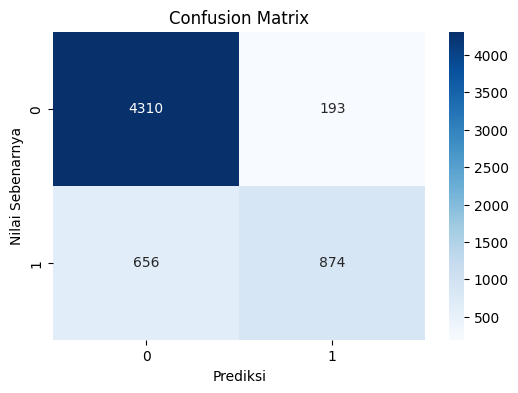

In [ ]:
# Menghitung akurasi
akurasi = accuracy_score(y_test, y_pred)
print(f"\nAkurasi model: {akurasi:.4f} atau {akurasi*100:.2f}%")

# Tampilkan laporan klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Nilai Sebenarnya')
plt.savefig('confusion_matrix.png')
plt.show()

True Negative (TN): 4310, yang merupakan jumlah prediksi benar untuk kelas 0 (<=50K).

False Positive (FP): 193, yang merupakan jumlah prediksi salah untuk kelas 0, tetapi sebenarnya kelas 1 (>50K).

False Negative (FN): 656, yang merupakan jumlah prediksi salah untuk kelas 1, tetapi sebenarnya kelas 0.

True Positive (TP): 874, yang merupakan jumlah prediksi benar untuk kelas 1 (>50K).


10 Fitur Paling Penting:
             Fitur  Kepentingan
10    capital_gain     0.206205
7     relationship     0.173785
5   marital_status     0.144627
4    education_num     0.139300
0              age     0.094786
12  hours_per_week     0.046878
11    capital_loss     0.046496
3        education     0.041466
6       occupation     0.033320
9              sex     0.029565


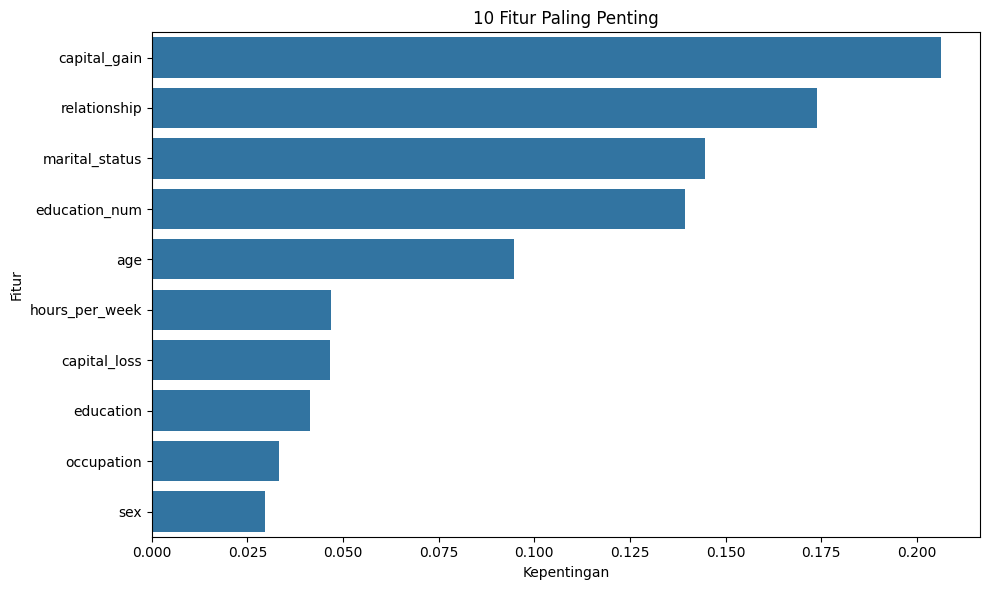

In [ ]:
# Fitur yang paling penting
fitur_penting = pd.DataFrame({
    'Fitur': X.columns,
    'Kepentingan': model.feature_importances_
}).sort_values('Kepentingan', ascending=False)

print("\n10 Fitur Paling Penting:")
print(fitur_penting.head(10))

# Visualisasi fitur penting
plt.figure(figsize=(10, 6))
sns.barplot(x='Kepentingan', y='Fitur', data=fitur_penting.head(10))
plt.title('10 Fitur Paling Penting')
plt.tight_layout()
plt.savefig('fitur_penting.png')
plt.show()

Grafik ini menunjukkan 10 fitur paling penting dalam model prediksi, berdasarkan ukuran kepentingannya. Fitur-fitur tersebut diurutkan dari yang paling penting di atas hingga yang paling tidak penting di bawah. Fitur capital_gain memiliki kepentingan tertinggi, diikuti oleh relationship, marital_status, dan seterusnya. Ini memberikan gambaran mengenai fitur-fitur mana yang paling mempengaruhi model dalam melakukan prediksi.